# -----------------------------------------------------------------------------

# MOD006562 - Machine Learning

# -----------------------------------------------------------------------------

# Importing Core Libraries

In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------------------------------------

# Data Collection & Exploration

In [262]:
# Load the dataset (This is News_Categories.csv, I renamed it to dataset.csv for simplicity)
df = pd.read_csv('dataset.csv')

In [263]:
# The first 5 rows of the dataset
df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,5/26/2018
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,5/26/2018
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,5/26/2018
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,5/26/2018
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",5/26/2018


In [264]:
# The last 5 rows of the dataset
df.tail()

,category,headline,authors,link,short_description,date
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,1/28/2012
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,NaN,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",1/28/2012
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",NaN,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",1/28/2012
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,NaN,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,1/28/2012
200852,SPORTS,Dwight Howard Rips Teammates After Magic Loss ...,NaN,https://www.huffingtonpost.com/entry/dwight-ho...,The five-time all-star center tore into his te...,1/28/2012


In [265]:
# Rows and Columns of the dataset
df.shape

(200853, 6)

In [266]:
# Info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   category           200853 non-null  object
 1   headline           200847 non-null  object
 2   authors            164233 non-null  object
 3   link               200853 non-null  object
 4   short_description  181141 non-null  object
 5   date               200853 non-null  object
dtypes: object(6)
memory usage: 10.7+ MB


In [267]:
# Statistical summary of the dataset
df.describe()

,category,headline,authors,link,short_description,date
count,200853,200847,164233,200853,181141,200853
unique,41,199343,27992,200812,178333,2309
top,POLITICS,Sunday Roundup,Lee Moran,https://www.huffingtonpost.comhttp://stylelike...,Welcome to the HuffPost Rise Morning Newsbrief...,4/24/2013
freq,32739,90,2423,2,192,100


In [268]:
# Checking for Null Values
df.isnull().sum()

category                 0
headline                 6
authors              36620
link                     0
short_description    19712
date                     0
dtype: int64

In [269]:
# Checking for Duplicates
df.duplicated().sum()

13

# -----------------------------------------------------------------------------

# Data Pre-processing & Preparation

In [270]:
# Drop Null Values
df = df.dropna()
df.isnull().sum()

category             0
headline             0
authors              0
link                 0
short_description    0
date                 0
dtype: int64

In [271]:
# Drop Duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [272]:
# Drop unnecessary columns: authors, link, date
df = df.drop(['authors', 'link', 'date'], axis=1)

In [273]:
# Display the updated dataset
df

,category,headline,short_description
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ..."
...,...,...,...
200843,TECH,Good Games -- Is It possible?,I don't think people who play Zynga games are ...
200844,TECH,Google+ Now Open for Teens With Some Safeguards,"For the most part, teens' experience on Google..."
200845,TECH,Web Wars,"These ""Web Wars"" threaten to rage on for some ..."
200847,TECH,Watch The Top 9 YouTube Videos Of The Week,If you're looking to see the most popular YouT...


In [274]:
# Merge headline and short_description into one column called 'text'
df['text'] = df['headline'] + ' ' + df['short_description']

# Drop headline and short_description columns because they are no longer needed
df = df.drop(['headline', 'short_description'], axis=1)

In [275]:
# Display the updated dataset
df

,category,text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...
...,...,...
200843,TECH,Good Games -- Is It possible? I don't think pe...
200844,TECH,Google+ Now Open for Teens With Some Safeguard...
200845,TECH,"Web Wars These ""Web Wars"" threaten to rage on ..."
200847,TECH,Watch The Top 9 YouTube Videos Of The Week If ...


In [276]:
# Display the unique categories
df['category'].unique()

array(['CRIME', 'ENTERTAINMENT', 'IMPACT', 'POLITICS', 'WEIRD NEWS',
       'WORLD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'LATINO VOICES', 'SCIENCE', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'WEDDINGS', 'FOOD & DRINK', 'DIVORCE', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

In [277]:
# Display the number of unique categories
df['category'].nunique()

41

In [278]:
# Array of culture and arts categories
culture_arts_categories = ['ARTS', 'CULTURE & ARTS', 'ARTS & CULTURE']

# Array of news categories
news_categories = ['WEIRD NEWS', 'WORLD NEWS', 'GOOD NEWS']

# Array of voices categories
voices_categories = ['LATINO VOICES', 'BLACK VOICES', 'QUEER VOICES']

# Bundle the culture and arts categories into one category called 'CULTURE & ARTS'
df['category'] = df['category'].replace(culture_arts_categories, 'CULTURE & ARTS')

# Bundle the news categories into one category called 'NEWS'
df['category'] = df['category'].replace(news_categories, 'NEWS')

# Bundle the voices categories into one category called 'VOICES'
df['category'] = df['category'].replace(voices_categories, 'VOICES')

In [279]:
# Display the unique categories
df['category'].unique()

array(['CRIME', 'ENTERTAINMENT', 'IMPACT', 'POLITICS', 'NEWS', 'VOICES',
       'WOMEN', 'COMEDY', 'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH',
       'RELIGION', 'SCIENCE', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'CULTURE & ARTS', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'WORLDPOST', 'FIFTY', 'WELLNESS', 'PARENTING',
       'HOME & LIVING', 'STYLE & BEAUTY', 'WEDDINGS', 'FOOD & DRINK',
       'DIVORCE', 'MONEY', 'ENVIRONMENT'], dtype=object)

In [280]:
# Display the number of unique categories
df['category'].nunique()

35

In [281]:
# Merge categories with the same or similar meaning
df['category'] = df['category'].replace('STYLE & BEAUTY', 'STYLE')
df['category'] = df['category'].replace('PARENTING', 'PARENTS')
df['category'] = df['category'].replace('COLLEGE', 'EDUCATION')
df['category'] = df['category'].replace('TASTE', 'FOOD & DRINK')
df['category'] = df['category'].replace('DIVORCE', 'WEDDINGS')
df['category'] = df['category'].replace('MONEY', 'BUSINESS')
df['category'] = df['category'].replace('HEALTHY LIVING', 'WELLNESS')
df['category'] = df['category'].replace('THE WORLDPOST', 'WORLDPOST')
df['category'] = df['category'].replace('WORLDPOST', 'NEWS')

In [282]:
# Drop trash categories
trash_categories = ['GREEN', 'FIFTY']
df = df[~df['category'].isin(trash_categories)]

In [283]:
# Display the unique categories
df['category'].unique()

array(['CRIME', 'ENTERTAINMENT', 'IMPACT', 'POLITICS', 'NEWS', 'VOICES',
       'WOMEN', 'COMEDY', 'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH',
       'RELIGION', 'SCIENCE', 'EDUCATION', 'PARENTS', 'CULTURE & ARTS',
       'STYLE', 'FOOD & DRINK', 'WELLNESS', 'HOME & LIVING', 'WEDDINGS',
       'ENVIRONMENT'], dtype=object)

In [284]:
# Display the number of unique categories
df['category'].nunique()

24

In [285]:
# Display the updated dataset
df

,category,text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...
...,...,...
200843,TECH,Good Games -- Is It possible? I don't think pe...
200844,TECH,Google+ Now Open for Teens With Some Safeguard...
200845,TECH,"Web Wars These ""Web Wars"" threaten to rage on ..."
200847,TECH,Watch The Top 9 YouTube Videos Of The Week If ...


In [286]:
# Reset the index
df = df.reset_index(drop=True)

In [287]:
# Display the updated dataset
df

,category,text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...
...,...,...
146254,TECH,Good Games -- Is It possible? I don't think pe...
146255,TECH,Google+ Now Open for Teens With Some Safeguard...
146256,TECH,"Web Wars These ""Web Wars"" threaten to rage on ..."
146257,TECH,Watch The Top 9 YouTube Videos Of The Week If ...


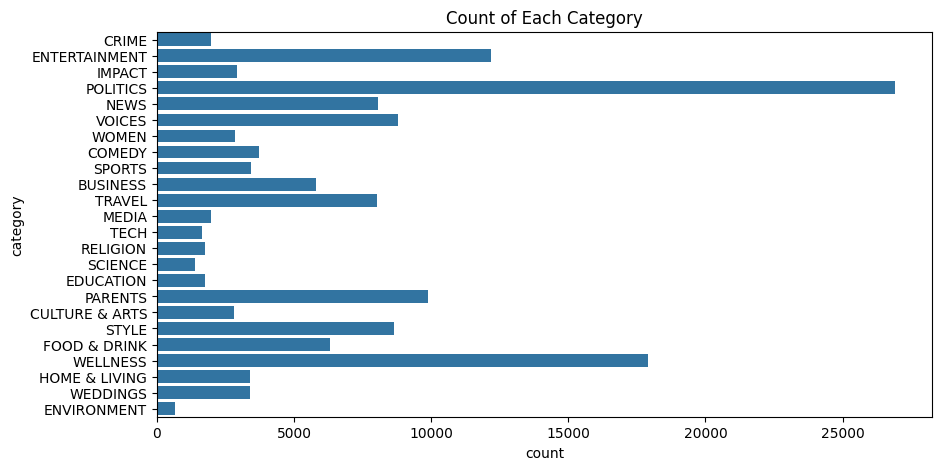

In [288]:
# Plot the count of each category
plt.figure(figsize=(10, 5))
sns.countplot(df['category'])
plt.title('Count of Each Category')
plt.show()

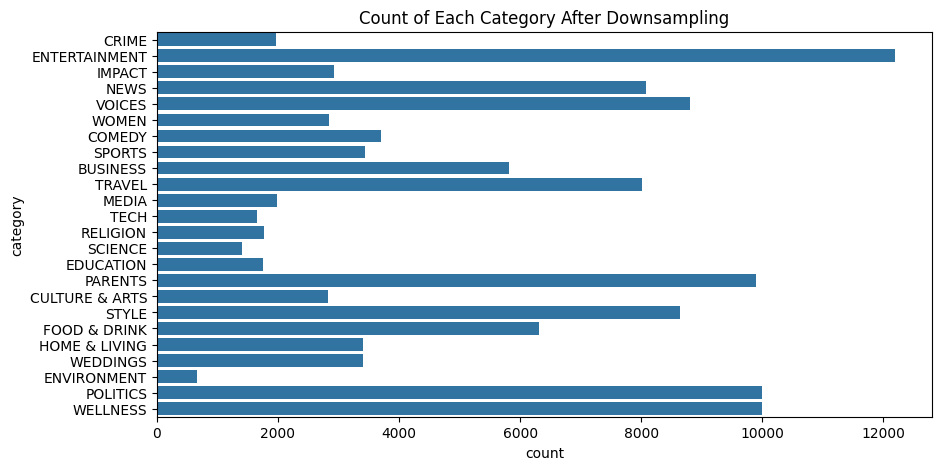

In [289]:
# Downsampling
from sklearn.utils import resample

# Separate the dataset into different categories
politics = df[df['category'] == 'POLITICS']
wellness = df[df['category'] == 'WELLNESS']
other_categories = df[(df['category'] != 'POLITICS') &
                      (df['category'] != 'WELLNESS')]

# Downsample the categories with more than 10000 samples
politics = resample(politics, replace=False, n_samples=10000, random_state=42)
wellness = resample(wellness, replace=False, n_samples=10000, random_state=42)

# Combine the downsampled categories back into a single DataFrame
df_downsampled = pd.concat([politics, wellness])

# Merge the downsampled DataFrame with the DataFrame of other categories
df = pd.concat([other_categories, df_downsampled])

# Plot the count of each category after downsampling
plt.figure(figsize=(10, 5))
sns.countplot(df['category'])
plt.title('Count of Each Category After Downsampling')
plt.show()

In [290]:
# Dropping columns that have less then 6000 samples, because we can't upweight them due to the lack of computational resources

# Count the number of samples in each category
category_counts = df['category'].value_counts()

# Get a list of categories that have less than 6000 samples
categories_to_drop = category_counts[category_counts < 6000].index

# Drop these categories from the DataFrame
df = df[~df['category'].isin(categories_to_drop)]

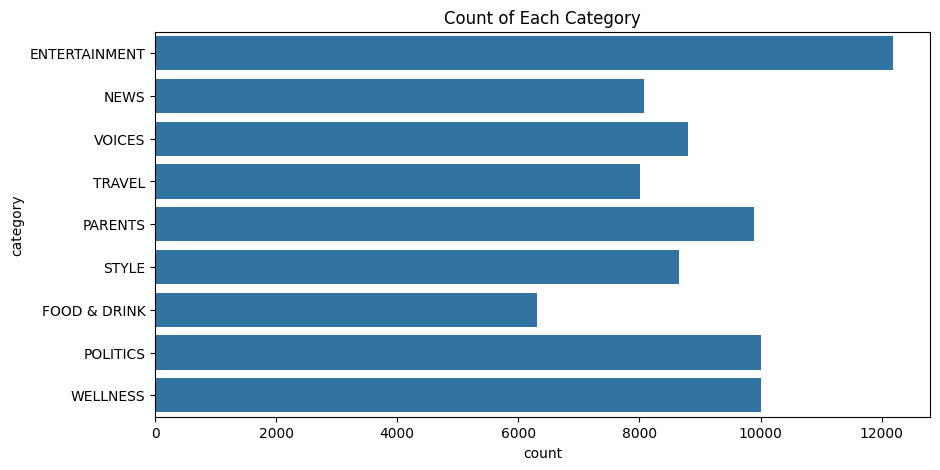

In [291]:
plt.figure(figsize=(10, 5))
sns.countplot(df['category'])
plt.title('Count of Each Category')
plt.show()

In [292]:
# Reset the index
df = df.reset_index(drop=True)

In [293]:
# Display the updated dataset
df

,category,text
0,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
1,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...
2,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
3,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...
4,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...
...,...,...
81924,WELLNESS,You Can't Outrun Your Fork We need to disprove...
81925,WELLNESS,Uber for Health Care? Think Again Clearly the...
81926,WELLNESS,Being Tall Might Up Your Risk For This Cancer ...
81927,WELLNESS,Pesticides Linked To Increased Childhood Cance...


# -----------------------------------------------------------------------------

# NLP

# -----------------------------------------------------------------------------